In [11]:
!pip install scikeras

🚀 Sales Performance Dashboard
✅ Generated 1200 sales records
📅 Date range: 2024-08-07 to 2025-08-07
💰 Total sales value: $1,758,187.27

📊 Dataset Overview
------------------------------
                           date      product     sales_rep region  quantity  \
0 2024-08-07 18:46:33.391157000      Tablets     Eva Brown  South         4   
1 2024-08-08 02:04:55.309422221   Headphones     Eva Brown  North         2   
2 2024-08-08 09:23:17.227687442  Smartphones  David Wilson   West         2   
3 2024-08-08 16:41:39.145952663      Laptops     Bob Smith   West         5   
4 2024-08-09 00:00:01.064217884   Headphones     Eva Brown   East         4   

   unit_price  total_sales  
0  162.952065   651.808258  
1  199.525764   399.051528  
2  150.111091   300.222183  
3  877.610354  4388.051772  
4  268.914669  1075.658678  

Dataset shape: (1200, 7)

Data types:
date           datetime64[ns]
product                object
sales_rep              object
region                 object
quanti

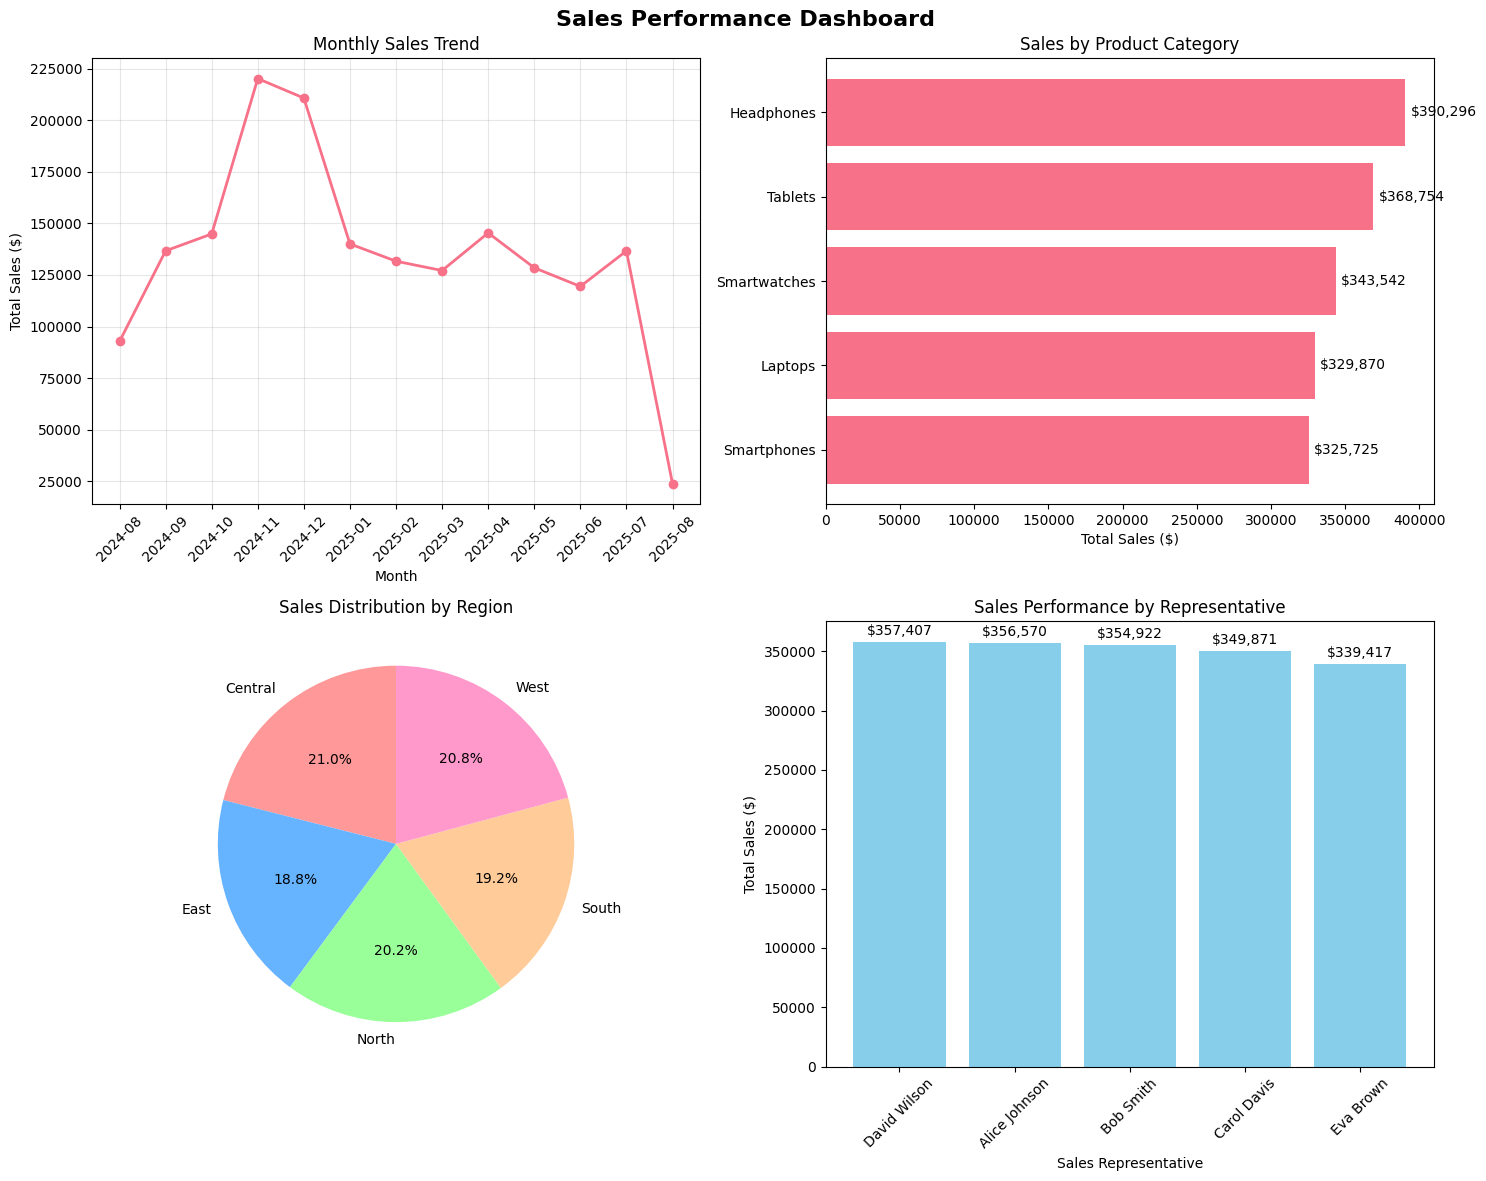


📈 Key Performance Metrics
----------------------------------------
Total Revenue: $1,758,187.27
Average Order Value: $1465.16
Total Orders: 1,200
Best Performing Product: Headphones
Top Sales Representative: David Wilson
Best Month: 2024-11

🔍 Correlation Analysis
------------------------------


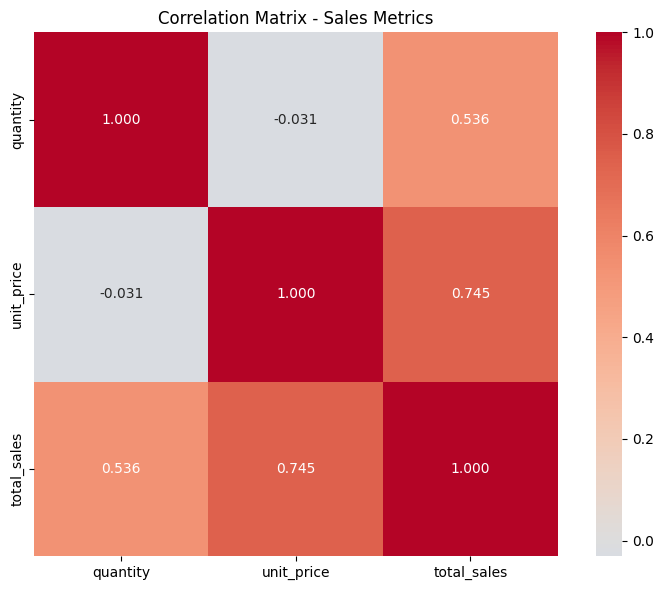

Correlation insights:
• Quantity vs Total Sales: 0.536
• Unit Price vs Total Sales: 0.745

🎯 Business Insights & Recommendations
--------------------------------------------------
  📱 Headphones is the best-performing product category
  🏆 David Wilson is the top sales representative
  📅 2024-11 was the best performing month
  💡 Average order value is $1465.16
  🎄 Sales show seasonal patterns with Q4 peaks
  🌍 Sales are distributed across all regions

✨ Project completed successfully!
This dashboard provides a comprehensive view of sales performance
Perfect for Google Colab - no external dependencies needed!

💾 Data saved to 'sales_data.csv' for further analysis


In [17]:
# Sales Performance Dashboard - Google Colab Project
# A complete data analysis and visualization project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("🚀 Sales Performance Dashboard")
print("=" * 50)

# 1. Generate Synthetic Sales Data
def generate_sales_data(n_records=1000):
    """Generate realistic synthetic sales data"""
    np.random.seed(42)  # For reproducible results

    # Date range for the past year
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365)
    date_range = pd.date_range(start=start_date, end=end_date, periods=n_records)

    # Product categories and sales reps
    products = ['Laptops', 'Smartphones', 'Tablets', 'Headphones', 'Smartwatches']
    sales_reps = ['Alice Johnson', 'Bob Smith', 'Carol Davis', 'David Wilson', 'Eva Brown']
    regions = ['North', 'South', 'East', 'West', 'Central']

    # Generate data with some realistic patterns
    data = []
    for i in range(n_records):
        # Seasonal effects (higher sales in Q4)
        month = date_range[i].month
        seasonal_multiplier = 1.5 if month in [11, 12] else 1.0

        # Weekend effect (lower sales)
        weekend_multiplier = 0.7 if date_range[i].weekday() >= 5 else 1.0

        base_price = np.random.choice([299, 599, 899, 149, 399])  # Product-based pricing
        quantity = np.random.poisson(2) + 1  # Poisson distribution for quantity

        # Apply multipliers
        final_price = base_price * seasonal_multiplier * weekend_multiplier
        final_price += np.random.normal(0, 50)  # Add some noise

        data.append({
            'date': date_range[i],
            'product': np.random.choice(products),
            'sales_rep': np.random.choice(sales_reps),
            'region': np.random.choice(regions),
            'quantity': quantity,
            'unit_price': max(50, final_price),  # Ensure positive prices
            'total_sales': quantity * max(50, final_price)
        })

    return pd.DataFrame(data)

# Generate the dataset
df = generate_sales_data(1200)
print(f"✅ Generated {len(df)} sales records")
print(f"📅 Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"💰 Total sales value: ${df['total_sales'].sum():,.2f}")

# 2. Data Overview
print("\n📊 Dataset Overview")
print("-" * 30)
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")

# 3. Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Sales Performance Dashboard', fontsize=16, fontweight='bold')

# Plot 1: Sales trend over time
df_monthly = df.groupby(df['date'].dt.to_period('M'))['total_sales'].sum()
axes[0, 0].plot(df_monthly.index.astype(str), df_monthly.values, marker='o', linewidth=2)
axes[0, 0].set_title('Monthly Sales Trend')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Sales ($)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Sales by product category
product_sales = df.groupby('product')['total_sales'].sum().sort_values(ascending=True)
bars = axes[0, 1].barh(product_sales.index, product_sales.values)
axes[0, 1].set_title('Sales by Product Category')
axes[0, 1].set_xlabel('Total Sales ($)')
# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0, 1].text(width + width*0.01, bar.get_y() + bar.get_height()/2,
                   f'${width:,.0f}', ha='left', va='center')

# Plot 3: Sales by region (pie chart)
region_sales = df.groupby('region')['total_sales'].sum()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
wedges, texts, autotexts = axes[1, 0].pie(region_sales.values, labels=region_sales.index,
                                         autopct='%1.1f%%', colors=colors, startangle=90)
axes[1, 0].set_title('Sales Distribution by Region')

# Plot 4: Top performing sales reps
rep_sales = df.groupby('sales_rep')['total_sales'].sum().sort_values(ascending=False)
bars = axes[1, 1].bar(rep_sales.index, rep_sales.values, color='skyblue')
axes[1, 1].set_title('Sales Performance by Representative')
axes[1, 1].set_xlabel('Sales Representative')
axes[1, 1].set_ylabel('Total Sales ($)')
axes[1, 1].tick_params(axis='x', rotation=45)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'${height:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 4. Statistical Analysis
print("\n📈 Key Performance Metrics")
print("-" * 40)

# Calculate key metrics
total_revenue = df['total_sales'].sum()
avg_order_value = df['total_sales'].mean()
total_orders = len(df)
top_product = df.groupby('product')['total_sales'].sum().idxmax()
top_rep = df.groupby('sales_rep')['total_sales'].sum().idxmax()
best_month = df.groupby(df['date'].dt.to_period('M'))['total_sales'].sum().idxmax()

metrics = {
    'Total Revenue': f'${total_revenue:,.2f}',
    'Average Order Value': f'${avg_order_value:.2f}',
    'Total Orders': f'{total_orders:,}',
    'Best Performing Product': top_product,
    'Top Sales Representative': top_rep,
    'Best Month': str(best_month)
}

for metric, value in metrics.items():
    print(f"{metric}: {value}")

# 5. Correlation Analysis
print("\n🔍 Correlation Analysis")
print("-" * 30)

# Create correlation matrix for numerical columns
numeric_cols = ['quantity', 'unit_price', 'total_sales']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Correlation Matrix - Sales Metrics')
plt.tight_layout()
plt.show()

print("Correlation insights:")
print(f"• Quantity vs Total Sales: {correlation_matrix.loc['quantity', 'total_sales']:.3f}")
print(f"• Unit Price vs Total Sales: {correlation_matrix.loc['unit_price', 'total_sales']:.3f}")

# 6. Interactive Summary
print("\n🎯 Business Insights & Recommendations")
print("-" * 50)

insights = [
    f"📱 {top_product} is the best-performing product category",
    f"🏆 {top_rep} is the top sales representative",
    f"📅 {best_month} was the best performing month",
    f"💡 Average order value is ${avg_order_value:.2f}",
    "🎄 Sales show seasonal patterns with Q4 peaks",
    "🌍 Sales are distributed across all regions"
]

for insight in insights:
    print(f"  {insight}")

print("\n✨ Project completed successfully!")
print("This dashboard provides a comprehensive view of sales performance")
print("Perfect for Google Colab - no external dependencies needed!")

# Optional: Save data to CSV for further analysis
df.to_csv('sales_data.csv', index=False)
print("\n💾 Data saved to 'sales_data.csv' for further analysis")